# Exploratory Data Analysis for Sunspot data

Source: WDC-SILSO, Royal Observatory of Belgium, Brussels (https://sidc.be/SILSO/datafiles)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(
    '../data/sunspot_raw_data/SN_d_tot_V2.0.csv', # data downloaded on 2024-12-18
    delimiter=';', 
    header=None, 
    names=['year', 'month', 'day', 'dec_year', 'sn_value', 'sn_error', 'obs_num', 'definitive_ind']
)

In [5]:
df.head()

,year,month,day,dec_year,sn_value,sn_error,obs_num,definitive_ind
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1


In [6]:
len(df)

75575

In [7]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [8]:
df.iloc[-10:]

,year,month,day,dec_year,sn_value,sn_error,obs_num,definitive_ind,date
75565,2024,11,21,2024.889,115,19.2,21,0,2024-11-21
75566,2024,11,22,2024.892,143,19.7,29,0,2024-11-22
75567,2024,11,23,2024.895,151,21.2,18,0,2024-11-23
75568,2024,11,24,2024.898,171,27.0,20,0,2024-11-24
75569,2024,11,25,2024.900,167,22.2,22,0,2024-11-25
75570,2024,11,26,2024.903,160,22.1,30,0,2024-11-26
75571,2024,11,27,2024.906,205,32.3,18,0,2024-11-27
75572,2024,11,28,2024.908,170,19.7,30,0,2024-11-28
75573,2024,11,29,2024.911,161,20.3,30,0,2024-11-29
75574,2024,11,30,2024.914,121,14.8,22,0,2024-11-30


In [9]:
df_recent = df[df['date'] >= '2010-08-12'].copy()
df_recent = df_recent.set_index('date')
len(df_recent)

5225

In [10]:
df_recent.head()

,year,month,day,dec_year,sn_value,sn_error,obs_num,definitive_ind
date,,,,,,,,
2010-08-12,2010,8,12,2010.612,50,5.5,22,1
2010-08-13,2010,8,13,2010.615,41,4.2,22,1
2010-08-14,2010,8,14,2010.618,33,3.4,19,1
2010-08-15,2010,8,15,2010.621,38,3.4,15,1
2010-08-16,2010,8,16,2010.623,51,7.2,19,1


In [11]:
# definitive_ind: 1 = definitive, 0 = provisional
# Use data that is definitive only
df_recent.groupby('definitive_ind').size()

definitive_ind
0     153
1    5072
dtype: int64

In [12]:
df_recent[df_recent['definitive_ind'] == 0].groupby('year').size()

year
2024    153
dtype: int64

In [13]:
df_recent[df_recent['definitive_ind'] == 0].groupby('year').min('date')

,month,day,dec_year,sn_value,sn_error,obs_num,definitive_ind
year,,,,,,,
2024,7,1,2024.499,70,9.7,14,0


In [14]:
df_recent = df_recent[df_recent['definitive_ind'] == 1]

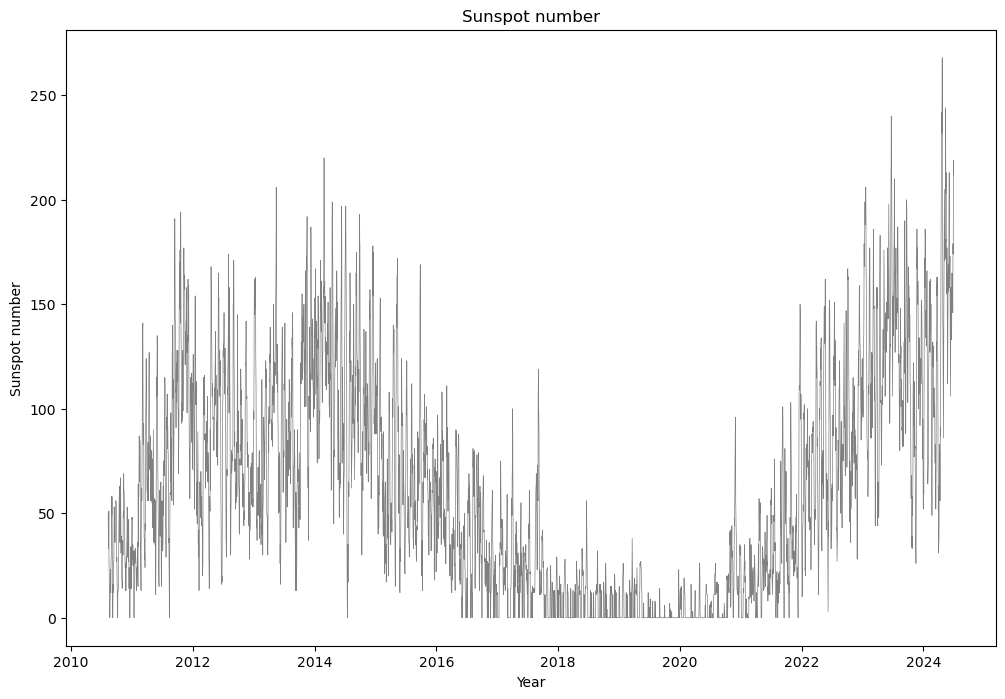

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(df_recent.index, df_recent['sn_value'], linewidth=0.5, c='grey')
plt.xlabel('Year')
plt.ylabel('Sunspot number')
plt.title('Sunspot number')
plt.show()

In [16]:
df_recent.iloc[0]

year              2010.000
month                8.000
day                 12.000
dec_year          2010.612
sn_value            50.000
sn_error             5.500
obs_num             22.000
definitive_ind       1.000
Name: 2010-08-12 00:00:00, dtype: float64

In [17]:
df_recent.iloc[-1]

year              2024.000
month                6.000
day                 30.000
dec_year          2024.496
sn_value           212.000
sn_error            27.600
obs_num             30.000
definitive_ind       1.000
Name: 2024-06-30 00:00:00, dtype: float64

In [18]:
# Start date: 2010-08-12 (NASA SDO)
# End date: 2024-06-30

In [19]:
# Create a labels.txt file such as:
# YYYYMMDD_512_HMII.jpg, sn_value

df_recent['date_str'] = df_recent.index.strftime('%Y%m%d')
df_recent['label'] = df_recent['date_str'] + '_512_HMII.jpg'

In [20]:
filenames = pd.read_csv('../data/filenames.txt', header=None, names=['label'])

In [21]:
filenames.head()

,label
0,20170328_512_HMII.jpg
1,20130907_512_HMII.jpg
2,20190314_512_HMII.jpg
3,20230530_512_HMII.jpg
4,20231030_512_HMII.jpg


In [22]:
df_recent.head()

,year,month,day,dec_year,sn_value,sn_error,obs_num,definitive_ind,date_str,label
date,,,,,,,,,,
2010-08-12,2010,8,12,2010.612,50,5.5,22,1,20100812,20100812_512_HMII.jpg
2010-08-13,2010,8,13,2010.615,41,4.2,22,1,20100813,20100813_512_HMII.jpg
2010-08-14,2010,8,14,2010.618,33,3.4,19,1,20100814,20100814_512_HMII.jpg
2010-08-15,2010,8,15,2010.621,38,3.4,15,1,20100815,20100815_512_HMII.jpg
2010-08-16,2010,8,16,2010.623,51,7.2,19,1,20100816,20100816_512_HMII.jpg


In [23]:
df_recent = pd.merge(filenames, df_recent, on='label', how='inner')
df_recent['label'] = df_recent['date_str'] + '_512_HMII.jpg, ' + df_recent['sn_value'].astype(str)

In [25]:
df_recent = df_recent.sort_values('label', ascending=False)
df_recent.label.head()

3097    20240630_512_HMII.jpg, 212
4768    20240629_512_HMII.jpg, 219
4042    20240628_512_HMII.jpg, 179
1375    20240627_512_HMII.jpg, 174
1885    20240626_512_HMII.jpg, 179
Name: label, dtype: object

In [26]:
np.savetxt('../data/img/labels.txt', df_recent['label'].values, fmt='%s')